## Notebook para realizar la parte 2 del TFM: clasificación de imágenes según tipo de célula sanguínea

Se tiene de entrada el dataset ____ y de salida se espera tener el acc del modelo

In [10]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import matplotlib.pyplot as plt
  
img_width, img_height = 360, 363

In [2]:
train_data_dir = '../../dataset/classification/PCB_Dataset_Split/train'
validation_data_dir = '../../dataset/classification/PCB_Dataset_Split/val'

nb_train_samples = 13671  
nb_validation_samples = 1705 

epochs = 10
batch_size = 16

In [3]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [4]:
train_datagen = ImageDataGenerator(
    rescale = 1. / 255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)
  
val_datagen = ImageDataGenerator(rescale = 1. / 255)
  
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'categorical')
  
validation_generator = val_datagen.flow_from_directory(
    validation_data_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'categorical')

Found 13671 images belonging to 8 classes.
Found 1705 images belonging to 8 classes.


In [5]:
# Modelo de prueba CNN

model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
  
model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
  
model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
  
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(8))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 359, 362, 32)      416       
                                                                 
 activation (Activation)     (None, 359, 362, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 179, 181, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 178, 180, 32)      4128      
                                                                 
 activation_1 (Activation)   (None, 178, 180, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 89, 90, 32)       0         
 2D)                                                    

In [6]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [7]:
history = model.fit_generator(
                        train_generator,
                        steps_per_epoch = nb_train_samples // batch_size,
                        epochs = epochs,
                        validation_data = validation_generator,
                        validation_steps = nb_validation_samples // batch_size)

C:\Users\shiru\AppData\Local\Temp\ipykernel_17948\2051623620.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
854/854 [==============================] - 820s 952ms/step - loss: 1.0580 - accuracy: 0.6170 - val_loss: 0.4412 - val_accuracy: 0.8827
Epoch 2/10
854/854 [==============================] - 626s 733ms/step - loss: 0.6073 - accuracy: 0.7954 - val_loss: 0.3343 - val_accuracy: 0.8974
Epoch 3/10
854/854 [==============================] - 626s 733ms/step - loss: 0.5120 - accuracy: 0.8298 - val_loss: 0.2887 - val_accuracy: 0.9151
Epoch 4/10
854/854 [==============================] - 629s 736ms/step - loss: 0.4622 - accuracy: 0.8555 - val_loss: 0.3991 - val_accuracy: 0.8679
Epoch 5/10
854/854 [==============================] - 628s 735ms/step - loss: 0.4243 - accuracy: 0.8683 - val_loss: 0.4510 - val_accuracy: 0.8815
Epoch 6/10
854/854 [==============================] - 676s 791ms/step - loss: 0.4159 - accuracy: 0.8794 - val_loss: 0.2866 - val_accuracy: 0.9210
Epoch 7/10
854/854 [==============================] - 720s 843ms/step - loss: 0.3999 - accuracy: 0.8778 - val_loss: 0.3063 -

In [15]:
# Guardamos el modelo
model.save(
    '../../model/classification/image_classification_CNN.h5',
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None,
    save_traces=True,
)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


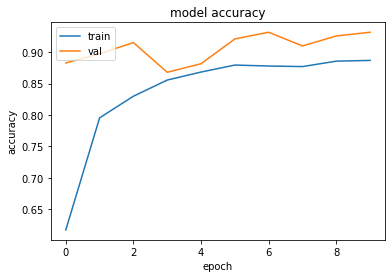

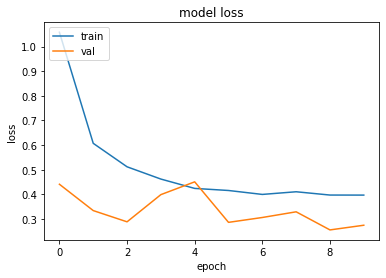

In [11]:
# Printeamos las gráficas de acc y loss
print(history.history.keys())

# acc
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()